Copyright 2022 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Support vector machines: Problem solving

This exercise uses the `baseball` dataset, which contains Major League Baseball data from 1986 and 1987.

The goal is to predict `Division` (E: East or W: West) using all the other variables.

| Variable  | Type    | Description                                                                      |
|:-----------|:---------|:----------------------------------------------------------------------------------|
| AtBat     | Ratio   | Number of times at bat in 1986                                                   |
| Hits      | Ratio   | Number of hits in 1986                                                           |
| HmRun     | Ratio   | Number of home runs in 1986                                                      |
| Runs      | Ratio   | Number of runs in 1986                                                           |
| RBI       | Ratio   | Number of runs batted in in 1986                                                 |
| Walks     | Ratio   | Number of walks in 1986                                                          |
| Years     | Ratio   | Number of years in the major leagues                                             |
| CAtBat    | Ratio   | Number of times at bat during his career                                         |
| CHits     | Ratio   | Number of hits during his career                                                 |
| CHmRun    | Ratio   | Number of home runs during his career                                            |
| CRuns     | Ratio   | Number of runs during his career                                                 |
| CRBI      | Ratio   | Number of runs batted in during his career                                       |
| CWalks    | Ratio   | Number of walks during his career                                                |
| League    | Nominal | A factor with levels A and N indicating player's league at the end of 1986       |
| Division  | Nominal | A factor with levels E and W indicating player's division at the end of 1986     |
| PutOuts   | Ratio   | Number of put outs in 1986                                                       |
| Assists   | Ratio   | Number of assists in 1986                                                        |
| Errors    | Ratio   | Number of errors in 1986                                                         |
| Salary    | Ratio   | 1987 annual salary on opening day in thousands of dollars                        |
| NewLeague | Nominal | A factor with levels A and N indicating player's league at the beginning of 1987 |

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
</div>
<br>

## Load data

Load `readr`, `dplyr`, `base` and `tidyr` so we can read data into a dataframe and manipulate it.

In [1]:
library(readr)
library(dplyr)
library(tidyr)
library(base)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="%ovw[;dNkqx,|V0M/RZA">tidyr</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable></variables><block type="import_R" id="q]np1Ju|B`4k*R-zylwU" x="44" y="66"><field name="libraryName" id="_;PP-/]_2fNUR.dyhw(8">readr</field><next><block type="import_R" id="(%@0XC,((6M%4]kj+iDm"><field name="libraryName" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><next><block type="import_R" id="l.:Sc#tFH?#!tX=Zl.4b"><field name="libraryName" id="%ovw[;dNkqx,|V0M/RZA">tidyr</field><next><block type="import_R" id="AmB3B[T@UHq1l2P*NjUF"><field name="libraryName" id="6C!l+@S8,SvtzakmsxQD">base</field></block></next></block></next></block></next></block></xml>


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Read `"datasets/baseball.csv"` into a dataframe, making the following variables factors:  `League`, `Division`, and `NewLeague`.

*Hint: You can look at the data file to determine the factor levels.*

In [6]:
dataframe = readr::read_csv("datasets/baseball.csv",col_types= list(League = col_factor(c("A","N")), Division = col_factor(c("E","W")), NewLeague = col_factor(c("A","N"))))

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="28" y="220"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id=",vaW{t?FHN1~E?+,h!w-"><mutation items="2"></mutation><field name="VAR" id="_;PP-/]_2fNUR.dyhw(8">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/baseball.csv</field></block></value><value name="ADD1"><block type="valueOutputCodeBlock_R" id="RYL4tG}[/O+7T5y`XOuz"><field name="CODE">col_types=</field><value name="INPUT"><block type="lists_create_with" id="v9!JeAQQpiI0V_C_{b8V"><mutation items="3"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="T;?!5*rVItg^SgGp3_[N"><field name="CODE">League = col_factor(c("A","N"))</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="{53!4Q1f^W2.-M3FR78)"><field name="CODE">Division = col_factor(c("E","W"))</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="0.{WR}9?5I:,qE-K#@fi"><field name="CODE">NewLeague = col_factor(c("A","N"))</field></block></value></block></value></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="8" y="304"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
593,172,22,82,100,57,1,593,172,22,82,100,57,A,W,1222,139,15,165,A


Check for NA.

In [7]:
base::summary(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="!Q.e}4-{mlohpY4,bq7j" x="-185" y="73"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">summary</field><data>base:summary</data><value name="ADD0"><block type="variables_get" id="WC|)7oRDJVadXh[gQFXH"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></xml>

     AtBat            Hits         HmRun            Runs       
 Min.   : 16.0   Min.   :  1   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:255.2   1st Qu.: 64   1st Qu.: 4.00   1st Qu.: 30.25  
 Median :379.5   Median : 96   Median : 8.00   Median : 48.00  
 Mean   :380.9   Mean   :101   Mean   :10.77   Mean   : 50.91  
 3rd Qu.:512.0   3rd Qu.:137   3rd Qu.:16.00   3rd Qu.: 69.00  
 Max.   :687.0   Max.   :238   Max.   :40.00   Max.   :130.00  
                                                               
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 28.00   1st Qu.: 22.00   1st Qu.: 4.000   1st Qu.:  816.8  
 Median : 44.00   Median : 35.00   Median : 6.000   Median : 1928.0  
 Mean   : 48.03   Mean   : 38.74   Mean   : 7.444   Mean   : 2648.7  
 3rd Qu.: 64.75   3rd Qu.: 53.00   3rd Qu.:11.000   3rd Qu.: 3924.2  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0 

------------------
**QUESTION:**

What was NA?

**ANSWER: (click here to edit)**

*59 of 322 had NA salary. That's a fair amount.*

-------------------

## Explore data

Load `ggplot2`, `psych`, `janitor`, `GGally` and `corrr`for exploring the data.

In [8]:
library(janitor)
library(corrr)
library(base)
library(ggplot2)
library(psych)
library(GGally)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jSJYE[.$3mc!]5z4c{`@">janitor</variable><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable><variable id=",xJ=qt0#Ig7$`IzNRoL:">GGally</variable></variables><block type="import_R" id="k.,xSim.rEx|fK*WwVUR" x="-79" y="-48"><field name="libraryName" id="jSJYE[.$3mc!]5z4c{`@">janitor</field><next><block type="import_R" id="fvM{-l%xz0![2.n:2Hoj"><field name="libraryName" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><next><block type="import_R" id="*VxvMC/-.UEwASPz(/;T"><field name="libraryName" id="6C!l+@S8,SvtzakmsxQD">base</field><next><block type="import_R" id="n?whQI8t]Qj6)k-ny|GN"><field name="libraryName" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><next><block type="import_R" id="P-VMU%%i=n!?0`h3v|jE"><field name="libraryName" id="-%rFagMkPz%VG@$q~ANP">psych</field><next><block type="import_R" id="]-EzVs8@-A8uc;R;)z%y"><field name="libraryName" id=",xJ=qt0#Ig7$`IzNRoL:">GGally</field></block></next></block></next></block></next></block></next></block></next></block></xml>


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Warning message:
“package ‘ggplot2’ was built under R version 4.2.2”

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Get descriptive statistics for the whole dataframe.

In [9]:
psych::describe(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="!Q.e}4-{mlohpY4,bq7j" x="-260" y="1"><mutation items="1"></mutation><field name="VAR" id="-%rFagMkPz%VG@$q~ANP">psych</field><field name="MEMBER">describe</field><data>psych:describe</data><value name="ADD0"><block type="variables_get" id="WC|)7oRDJVadXh[gQFXH"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></xml>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AtBat,1,322,380.928571,153.404981,379.5,382.151163,194.2206,16,687,671,-0.07733515,-0.907315090,8.5489254
Hits,2,322,101.024845,46.454741,96.0,99.403101,53.3736,1,238,237,0.28844709,-0.528974896,2.5888215
HmRun,3,322,10.770186,8.709037,8.0,9.775194,7.4130,0,40,40,0.89639035,0.001943684,0.4853357
Runs,4,322,50.909938,26.024095,48.0,49.631783,28.1694,0,130,130,0.41191368,-0.544152546,1.4502661
RBI,5,322,48.027950,26.166895,44.0,46.158915,25.2042,0,121,121,0.60272076,-0.331301876,1.4582240
Walks,6,322,38.742236,21.639327,35.0,37.147287,22.2390,0,105,105,0.61451844,-0.289071395,1.2059125
Years,7,322,7.444099,4.926087,6.0,6.984496,4.4478,1,24,23,0.77245758,-0.180561803,0.2745201
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
League*,14,322,1.456522,0.4988813,1.0,1.445736,0.0000,1.0,2,1.0,0.17376171,-1.9759143,0.02780157


Get descriptive statistics for the dataframe **after** you drop na.

In [10]:
dataframe %>%
    tidyr::drop_na() %>%
    psych::describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="%ovw[;dNkqx,|V0M/RZA">tidyr</variable><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable></variables><block type="pipe_R" id="J6-L^y9c1|(*J%hop23z" x="-139" y="99"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id=".i^:FVx|dmwq2OW!J^h1"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="zE.wQy/G9?72{99F/0p9"><mutation items="1"></mutation><field name="VAR" id="%ovw[;dNkqx,|V0M/RZA">tidyr</field><field name="MEMBER">drop_na</field><data>tidyr:drop_na</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="!Q.e}4-{mlohpY4,bq7j"><mutation items="1"></mutation><field name="VAR" id="-%rFagMkPz%VG@$q~ANP">psych</field><field name="MEMBER">describe</field><data>psych:describe</data></block></value></block></xml>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AtBat,1,263,403.642586,147.307209,413,406.15166,185.3250,19,687,668,-0.1459429,-0.9850757,9.0833516
Hits,2,263,107.828897,45.125326,103,106.54028,51.8910,1,238,237,0.2391944,-0.5759113,2.7825468
HmRun,3,263,11.619772,8.757108,9,10.72038,8.8956,0,40,40,0.7859117,-0.2251684,0.5399864
Runs,4,263,54.745247,25.539816,52,53.68720,29.6520,0,130,130,0.3488162,-0.6114020,1.5748525
RBI,5,263,51.486692,25.882714,47,49.68720,26.6868,0,121,121,0.5555302,-0.4432596,1.5959965
Walks,6,263,41.114068,21.718056,37,39.72038,23.7216,0,105,105,0.5334992,-0.4428777,1.3391927
Years,7,263,7.311787,4.793616,6,6.85782,4.4478,1,24,23,0.8006528,-0.1029274,0.2955870
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
League*,14,263,1.471483,0.5001378,1,1.464455,0.0000,1.0,2,1.0,0.11360340,-1.99463511,0.03083982


------------------
**QUESTION:**

Based on the changes in means, what is the consequence if we drop NA from our analysis?

**ANSWER: (click here to edit)**

*Almost all stats go up, but years go down. This suggests that salaries weren't available for some older players who had lower stats. There was almost no effect on the target variable `Division`*

-------------------

Update the dataframe by dropping NA.

In [11]:
dataframe = dataframe %>%
    tidyr::drop_na()

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="%ovw[;dNkqx,|V0M/RZA">tidyr</variable></variables><block type="variables_set" id="dSd/7cN]dxLi]5aOx*cL" x="-123" y="58"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="pipe_R" id="WqzxvhEZ*^+:9TR4`k|a"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="pKv|,Z}51#+5@KFVC#?K"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="LK.[Y8CK09Dk/~+7%`L9"><mutation items="1"></mutation><field name="VAR" id="%ovw[;dNkqx,|V0M/RZA">tidyr</field><field name="MEMBER">drop_na</field><data>tidyr:drop_na</data></block></value></block></value></block><block type="variables_get" id="Lhzu/}u)m#WNW|B9=Xj$" x="-139" y="188"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
408,117,11,66,41,34,1,408,117,11,66,41,34,N,W,942,72,11,120,N


Create a correlation heatmap.

Non-numeric variables removed from input: `League`, `Division`, and `NewLeague`
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


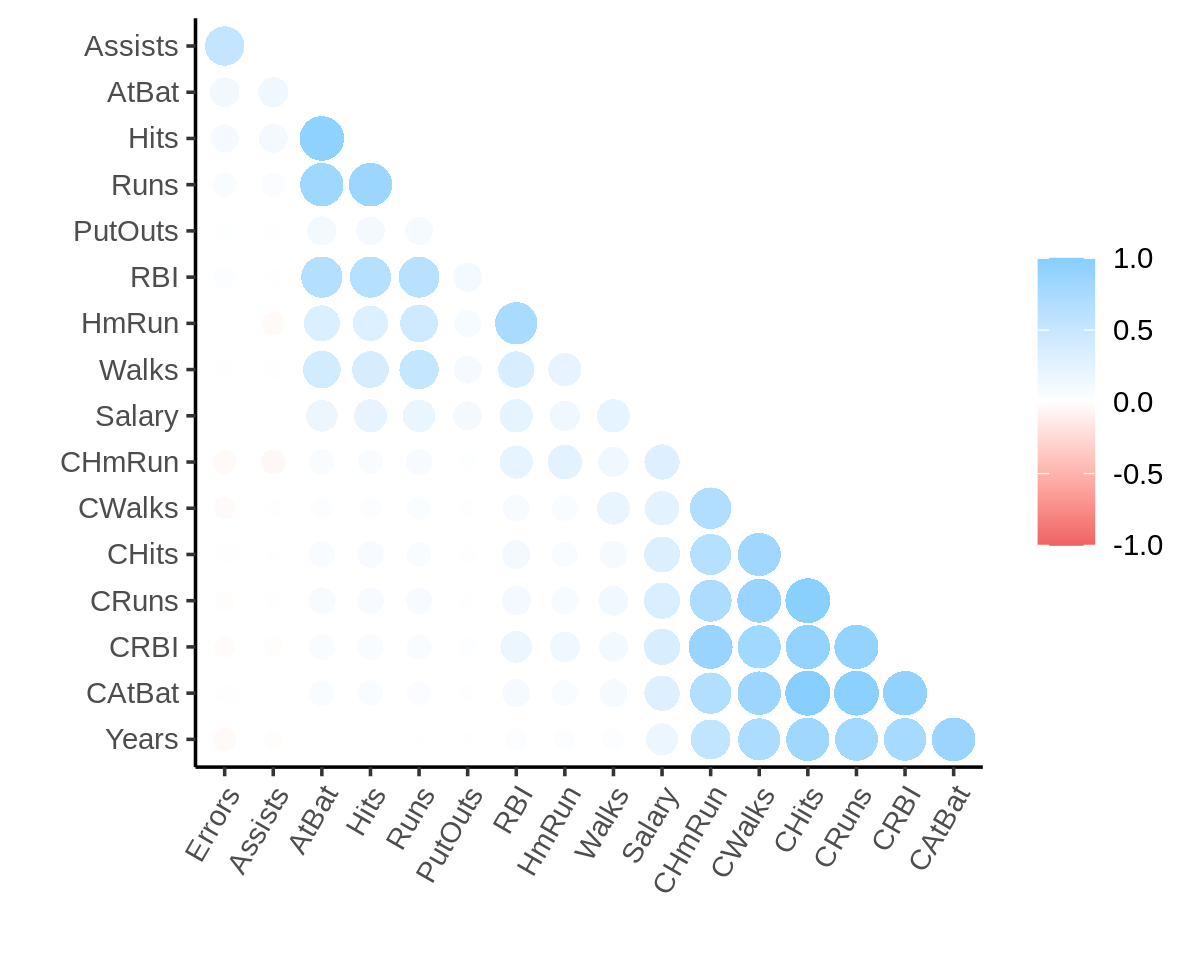

In [12]:
dataframe %>%
    corrr::correlate() %>%
    corrr::rearrange() %>%
    corrr::shave() %>%
    corrr::rplot() +
    ggplot2::theme(axis.text.x = element_text(angle = 60, hjust = 1))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable></variables><block type="pipe_R" id="N12|vt`l[nbbEa%Y~#m8" x="-52" y="-175"><mutation items="4"></mutation><value name="INPUT"><block type="variables_get" id="gVhqUlh8Cy^F.8HkQSR$"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="!IGLlvXdM16CaY84=Bg6"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">correlate</field><data>corrr:correlate</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="}:lkTT23H2F#0KMm`|,/"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">rearrange</field><data>corrr:rearrange</data></block></value><value name="ADD2"><block type="varDoMethod_R" id="O/(t7,oDux_+[+q!kGh6"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">shave</field><data>corrr:shave</data></block></value><value name="ADD3"><block type="ggplot_plus_R" id="3ilR0aqrIo(uJr*!6bpU"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="=#E:Zp_ck$*)mk/i8`^K"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">rplot</field><data>corrr:rplot</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="f#R*ao;9?HYu9{XmEY3r"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">theme</field><data>ggplot2:theme</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="@ce!p}8ffHehsPmXP[bV"><field name="CODE">axis.text.x = element_text(angle = 60, hjust = 1)</field></block></value></block></value></block></value></block></xml>

------------------
**QUESTION:**

What groups of variables are strongly correlated?

**ANSWER: (click here to edit)**

- Hitting/batting in 1986 
- Years and hitting/batting over career
- Assists and errors

-------------------

**Note**: Although we have a lot of multicolinearity, that is not necessarily a problem for *penalized* methods like SVM, ridge, and lasso regression.
However, the value of the penalty parameter `C` becomes even more important with multicolinearity.

Create a scatter matrix, changing the plot dimensions as needed.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

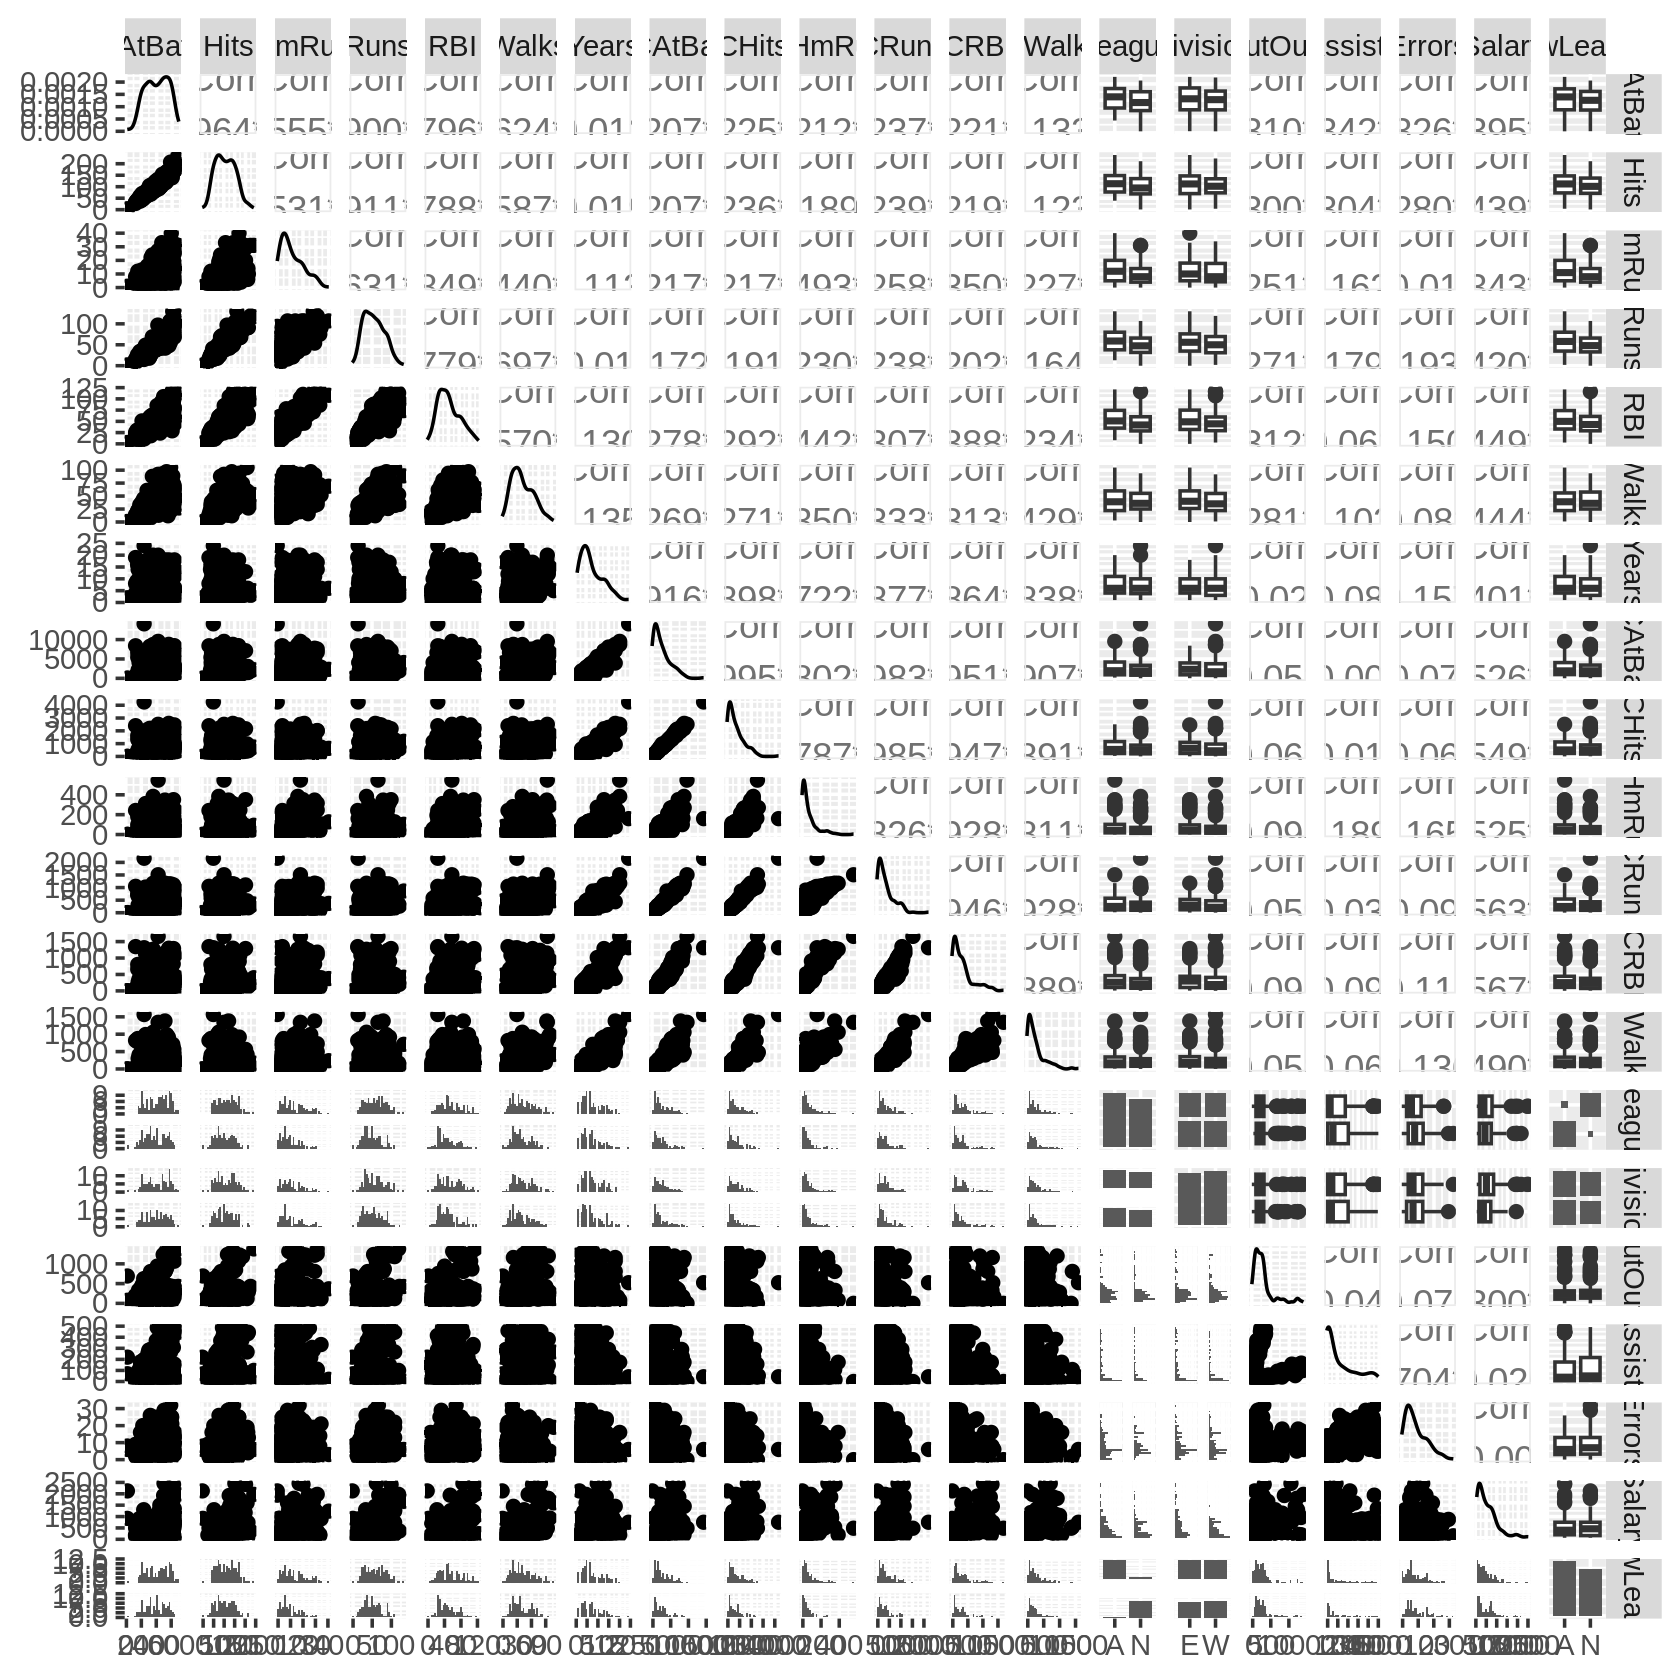

In [15]:
base::options(repr.plot.height = 7)

base::options(repr.plot.width = 7)

dataframe %>%
    GGally::ggpairs()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id=",xJ=qt0#Ig7$`IzNRoL:">GGally</variable></variables><block type="varDoMethod_R" id="bPBTU}En)n#+`:r9%Yw(" x="-153" y="-71"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">options</field><data>base:options</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="8(cB^zT$+0LJXdUD1~.,"><field name="CODE">repr.plot.height = 7</field></block></value></block><block type="varDoMethod_R" id="`OVkK$M+w#9I*0v*SgBU" x="-125" y="-15"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">options</field><data>base:options</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="f..+}M5G%}EF%Cx$oLp-"><field name="CODE">repr.plot.width = 7</field></block></value></block><block type="pipe_R" id="}wC%Vv;WrPYG)0o[vPs+" x="-170" y="94"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="z3SLzmZ|CtF.SVlj:D:P"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="ioP~1S4U+?~Wt=f%+P,+"><mutation items="1"></mutation><field name="VAR" id=",xJ=qt0#Ig7$`IzNRoL:">GGally</field><field name="MEMBER">ggpairs</field><data>GGally:ggpairs</data></block></value></block></xml>

------------------
**QUESTION:**

What do you see for `Division`, and what does this mean for our model?

**ANSWER: (click here to edit)**

*There appear to be many outliers and few/no variables on which division is well separated. This suggests that a linear model is a bad choice.*

-------------------

Make a frequency table for `Division`.

In [16]:
janitor::tabyl(dataframe,Division)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jSJYE[.$3mc!]5z4c{`@">janitor</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="AlJM%Y|L}Ls,SeRMSB1}" x="-236" y="-140"><mutation items="2"></mutation><field name="VAR" id="jSJYE[.$3mc!]5z4c{`@">janitor</field><field name="MEMBER">tabyl</field><data>janitor:tabyl</data><value name="ADD0"><block type="variables_get" id="N$,X%5c#Ws1{lF;x$qac"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="8e;;h.O(yqrQnR#k1!Ac"><field name="CODE">Division</field></block></value></block></xml>

Division,n,percent
<fct>,<int>,<dbl>
E,129,0.4904943
W,134,0.5095057


------------------
**QUESTION:**

What can you say about the balance between the classes and any possible problems that may result?

**ANSWER: (click here to edit)**

*The classes are almost perfectly balanced, so we don't expect any problems from imbalance.*

-------------------

## Prepare train/test sets

Load the package for splitting.

In [18]:
library(rsample)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable></variables><block type="import_R" id="aFBwKpYz$V@3rI9Nk71a" x="-280" y="10"><field name="libraryName" id="~~-I(f=60)#JfKGvV_AP">rsample</field></block></xml>

Warning message:
“package ‘rsample’ was built under R version 4.2.2”


Now split the data, but first specify a random seed of 2.

In [19]:
base::set.seed(2)

data_split = rsample::initial_split(dataframe,prop=.80)
data_train = rsample::training(data_split)
data_test = rsample::testing(data_split)

data_train

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="bQ!4E:J!~]0(]7KV]m@=">data_split</variable><variable id=":iMr},W7(N7vSLAUw!ao">data_train</variable><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="varDoMethod_R" id="Bs.?L_yk:!JU:!D9$e:2" x="-107" y="198"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">set.seed</field><data>base:set.seed</data><value name="ADD0"><block type="math_number" id="y3|#H:ii-(np[L}nH,7)"><field name="NUM">2</field></block></value></block><block type="variables_set" id="s!g),aa^(]dox/f`@P!y" x="-116" y="313"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field><value name="VALUE"><block type="varDoMethod_R" id="hPsr6}9C/VNgaLsKuR,o"><mutation items="2"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">initial_split</field><data>rsample:initial_split</data><value name="ADD0"><block type="variables_get" id="]~#@ltf];dTom_%pzV4n"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R`?vH79hsA6Duxa9)AFX"><field name="CODE">prop=.80</field></block></value></block></value><next><block type="variables_set" id="3J6#JDFV0wE?V;NuM=?L"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field><value name="VALUE"><block type="varDoMethod_R" id="X|Q7lj,pD_9W{%^.xd7h"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">training</field><data>rsample:training</data><value name="ADD0"><block type="variables_get" id="JFCmHyJPiN`qwnlE~:iT"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value><next><block type="variables_set" id="Y]ag(g~}tkN6:_X*]6P{"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field><value name="VALUE"><block type="varDoMethod_R" id="WBYo8G|ZcojJAqETRnv`"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">testing</field><data>rsample:testing</data><value name="ADD0"><block type="variables_get" id="p^~x9|Zj((6qaUVvj#.E"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value></block></next></block></next></block><block type="variables_get" id="9j){6[r67+7OFx`a~K[Y" x="-115" y="515"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field></block></xml>

AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
327,68,13,42,29,45,18,3949,939,78,438,380,466,A,E,659,53,7,400,A
573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960,A
246,76,5,35,39,13,6,912,234,12,102,96,80,A,E,44,0,1,250,A
381,110,9,61,45,32,7,3015,834,40,451,249,168,N,E,228,7,5,800,N
415,115,27,97,71,68,3,711,184,45,156,119,99,N,W,274,2,7,300,N
404,92,11,54,49,18,6,1354,325,30,188,135,63,A,E,222,5,5,300,A
614,163,29,89,83,75,11,5017,1388,266,813,822,617,N,W,303,6,6,1900,N
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A


## Fit model

Load the `recipes` and `workflows` packages, along with `parsnip`, `generics`, `hardhat`, and `broom`.

In [20]:
library(recipes)
library(workflows)
library(generics)
library(parsnip)
library(hardhat)
library(broom)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable><variable id="Ubl?FFCN5uCFfCTQ?7:z">broom</variable></variables><block type="import_R" id="EGE;dT.cnN,o}Y[99#Qb" x="-12" y="8"><field name="libraryName" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><next><block type="import_R" id="6DrE-26ByLD$vC}QeW:}"><field name="libraryName" id="haMDnc8Uj|EjY^608!;]">workflows</field><next><block type="import_R" id="hQ4(=]9%QB3(VWqs9OK:"><field name="libraryName" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><next><block type="import_R" id="d1vIIBH:{ygkVLV/Ts5l"><field name="libraryName" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><next><block type="import_R" id="vFfUgs[O$$~/VO1yVa~v"><field name="libraryName" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><next><block type="import_R" id="cegz.xTQ~Bq[q~wqZQHD"><field name="libraryName" id="Ubl?FFCN5uCFfCTQ?7:z">broom</field></block></next></block></next></block></next></block></next></block></next></block></xml>

Warning message:
“package ‘recipes’ was built under R version 4.2.2”

Attaching package: ‘recipes’


The following object is masked from ‘package:stats’:

    step


Warning message:
“package ‘workflows’ was built under R version 4.2.2”

Attaching package: ‘generics’


The following object is masked from ‘package:dplyr’:

    explain


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union


Warning message:
“package ‘parsnip’ was built under R version 4.2.2”


Make a workflow to predict `Division` with an rbf SVM and a step that standardizes numeric predictors.

In [53]:
recipe = recipes::recipe(Division ~ .,data = data_train) %>%
    recipes::step_normalize(recipes::all_numeric_predictors())
model = parsnip::svm_rbf(cost =  5) %>%
    parsnip::set_mode("classification") %>%
    parsnip::set_engine("kernlab")
workflow = workflows::workflow() %>%
    workflows::add_model(model) %>%
    workflows::add_recipe(recipe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Oz8-33unXZJ?3~@*32r-">recipe</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable></variables><block type="variables_set" id="w{}j6,P|-6Qepjtz/mj{" x="77" y="213"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field><value name="VALUE"><block type="pipe_R" id="uzp8+LCnH{r`1Xn%3mdK"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="U^,K1TWD+}odaY!kExkh"><mutation items="2"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">recipe</field><data>recipes:recipe</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="n(du-Q]_KTwoCFj6n|V5"><field name="CODE">Division ~ .</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lIU{_ql0epb7NH-C6Kvw"><field name="CODE">data = data_train</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="5=08G^e872=?+){KI?5}"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">step_normalize</field><data>recipes:step_normalize</data><value name="ADD0"><block type="varDoMethod_R" id="DEvi*v6Y{#}d{h35/S#3"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">all_numeric_predictors</field><data>recipes:all_numeric_predictors</data></block></value></block></value></block></value><next><block type="variables_set" id="*(u89h_-M@(PB-!qP/1l"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field><value name="VALUE"><block type="pipe_R" id="Oj1:/l+xksT^dSM;w{,g"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="m!?PwvZD%AJHhH1paJ[8"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">svm_rbf</field><data>parsnip:svm_rbf</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="iP`lGU_Nf!$/q0V2={b8"><field name="CODE">cost =  1</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="ady`8N}J*2BV_*AmtF`n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_mode</field><data>parsnip:set_mode</data><value name="ADD0"><block type="text" id="#4#x{=R9!%aA:_,cHnF("><field name="TEXT">classification</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="bybPF(gahfhB3cmyy;/n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_engine</field><data>parsnip:set_engine</data><value name="ADD0"><block type="text" id="v9=Ry*6UUQjzFr5Sy@,f"><field name="TEXT">kernlab</field></block></value></block></value></block></value><next><block type="variables_set" id="f%c#[D)Zv:uHH6WY_TQI"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Rk~*~r(!3iF+cvcz7IiD"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="H!7?PcsriTx,;-jJmb`7"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">workflow</field><data>workflows:workflow</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="CrWn^(|[{],FV=/-Jt!b"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_model</field><data>workflows:add_model</data><value name="ADD0"><block type="variables_get" id="7MGIpZZh#XkK`d+ZY4h:"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="L1.O)ZR~Ab`VSER(L}FZ"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_recipe</field><data>workflows:add_recipe</data><value name="ADD0"><block type="variables_get" id="U.@@S3Rdx{:xKxE[Fsx]"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field></block></value></block></value></block></value></block></next></block></next></block></xml>

Fit the workflow.

In [54]:
trained_model = generics::fit(workflow,data = data_train)

trained_model

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="l#fwZ4WDUe#-#XAb#q^;">trained_model</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable></variables><block type="variables_set" id="6F5Ls%m;fDN%1P.HL;~b" x="71" y="186"><field name="VAR" id="l#fwZ4WDUe#-#XAb#q^;">trained_model</field><value name="VALUE"><block type="varDoMethod_R" id="jAjgrG@)Vv]=~@dnuh7H"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="KB;+aD=xFzgUg0(`:xP:"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="siA`Xs!U2c1Ww}6ggh90"><field name="CODE">data = data_train</field></block></value></block></value></block><block type="variables_get" id="qJ0nFc9Y6f9.~_a8X@r6" x="76" y="309"><field name="VAR" id="l#fwZ4WDUe#-#XAb#q^;">trained_model</field></block></xml>

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: svm_rbf()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────
Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.0693702032452136 

Number of Support Vectors : 190 

Objective Function Value : -530.627 
Training error : 0.109524 
Probability model included. 

Use `augment` to get predictions.

In [55]:
data_evaluation = generics::augment(trained_model,data_test)

data_evaluation

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F$%83*WA}Squkx=^;86c">data_evaluation</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="l#fwZ4WDUe#-#XAb#q^;">trained_model</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="variables_set" id="c9)bbL(P.=Zt*ANq:wTF" x="-188" y="165"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field><value name="VALUE"><block type="varDoMethod_R" id="@!!94T,fy7p./bN/HI:m"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="b-|JBRwH@EMvsFWEJ!;A"><field name="VAR" id="l#fwZ4WDUe#-#XAb#q^;">trained_model</field></block></value><value name="ADD1"><block type="variables_get" id="DT;7fC1oy;O,X]8)3FM1"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field></block></value></block></value></block><block type="variables_get" id="OI3EYMFqtCofk(0Ma~i+" x="-177" y="283"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field></block></xml>

AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,.pred_class,.pred_E,.pred_W
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N,W,0.5238732,0.4761268
594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A,E,0.4898536,0.5101464
629,168,18,73,102,40,18,8424,2464,164,1008,1072,402,A,E,1067,157,14,776.667,A,W,0.5141680,0.4858320
474,129,10,50,56,40,10,2331,604,61,246,327,166,N,W,732,83,13,750.000,N,E,0.4804450,0.5195550
379,106,10,38,60,30,14,6207,1906,146,859,803,571,N,W,72,170,24,850.000,N,W,0.5352033,0.4647967
268,60,5,24,25,15,2,350,78,5,34,29,18,N,W,442,59,6,90.000,N,W,0.5043240,0.4956760
181,41,1,15,21,33,2,232,50,4,20,29,45,A,E,326,29,5,67.500,A,W,0.5363242,0.4636758
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
633,210,6,91,56,59,6,3070,872,19,420,230,274,N,W,367,432,16,90,N,E,0.4777851,0.5222149


## Evaluate the model

Load `yardstick` to get performance metrics.

In [56]:
library(yardstick)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable></variables><block type="import_R" id="AZq!7y:AKY3O6PsjAWMu" x="-161" y="10"><field name="libraryName" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field></block></xml>

Get the accuracy, recall, precision, and F1.

In [57]:
list(yardstick::accuracy(data_evaluation,truth=Division,estimate=.pred_class), yardstick::precision(data_evaluation,truth=Division,estimate=.pred_class), yardstick::recall(data_evaluation,truth=Division,estimate=.pred_class), yardstick::f_meas(data_evaluation,truth=Division,estimate=.pred_class)) %>%
    dplyr::bind_rows()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id="F$%83*WA}Squkx=^;86c">data_evaluation</variable></variables><block type="pipe_R" id="4`_*5SvnS~Sa.p=3S#OI" x="-179" y="-223"><mutation items="1"></mutation><value name="INPUT"><block type="lists_create_with" id="|A+]|U,HA2TI/$inZo$N"><mutation items="4"></mutation><value name="ADD0"><block type="varDoMethod_R" id="ovJDL$T;GrTBZ,)jMz;a"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">accuracy</field><data>yardstick:accuracy</data><value name="ADD0"><block type="variables_get" id="$#GYCvI1LKXt%Rsb09a}"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="i#@XFD{vr]B47yD52|(B"><field name="CODE">truth=Division</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="(x50a~#{oijRotT|Z?8G"><field name="CODE">estimate=.pred_class</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="j8eqada{+]K+(kP]fjd["><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">precision</field><data>yardstick:precision</data><value name="ADD0"><block type="variables_get" id="UEG_cZtZh0$Qd^M!JdR3"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="|Z)xC?L]O4:;pY-Yx}[`"><field name="CODE">truth=Division</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="/-*t{(I-ds+mDl%{qy}v"><field name="CODE">estimate=.pred_class</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="9kYm6fYJ_jy~n1FTvM}*"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">recall</field><data>yardstick:recall</data><value name="ADD0"><block type="variables_get" id="1^]4G]IyxmvdiCk.z~.8"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lpEx2Z_OPFriJq*Isu@T"><field name="CODE">truth=Division</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="`x3kIKM$)S]L}UQK]4_="><field name="CODE">estimate=.pred_class</field></block></value></block></value><value name="ADD3"><block type="varDoMethod_R" id="n:|F(r?P|^4inAx3PqFZ"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">f_meas</field><data>yardstick:f_meas</data><value name="ADD0"><block type="variables_get" id=":qt8OD9;Au+.@WF}CY$@"><field name="VAR" id="F$%83*WA}Squkx=^;86c">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="{~pcwmOK5=}7-KN18T%e"><field name="CODE">truth=Division</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="Dp]`|Qqrb4?=dU-1o?_o"><field name="CODE">estimate=.pred_class</field></block></value></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="Ivg[L*te{4kkI16K6!!~"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">bind_rows</field><data>dplyr:bind_rows</data></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5094340
precision,binary,0.4782609
recall,binary,0.4400000
f_meas,binary,0.4583333


------------------
**QUESTION:**

What division are these results for?

**ANSWER: (click here to edit)**

*We specified `E` as the first level of the factor, so these results are for `E`.*

-------------------

**QUESTION:**

Are you surprised by the classifier's ability to distinguish between East and West MLB divisions?
Why or why not?

**ANSWER: (click here to edit)**

*I would expect the divisions to be about the same in terms of batting ability, salary, etc, but these results suggest that there are differences the classifier can capitalize on. 
According to Wikipedia, East has historically sent more teams to championships, suggesting it is the stronger division.*

-------------------

**QUESTION:**

Try going back and changing `C` to different values to see how that effects the results. Try low values below 1 and large values up to 5.

What values did you try, and how did the accuracy change?

**ANSWER: (click here to edit)**

*Smaller C at .5 was better and and .1 was worse. C > 1 seems to be worse.*

-------------------

## Visualizing

Show feature importance.

In [58]:
temp = trained_model %>%
    hardhat::extract_fit_engine()

temp@coef[[1]] %*% temp@xmatrix[[1]] %>%
    base::data.frame() %>%
    tidyr::pivot_longer(everything()) %>%
    dplyr::arrange(value)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="t]+H-8+H*^PHWBKOQ@|G">temp</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="%ovw[;dNkqx,|V0M/RZA">tidyr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="l#fwZ4WDUe#-#XAb#q^;">trained_model</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable></variables><block type="variables_set" id=".GndRVXmS84;HLmc6C$c" x="-185" y="-244"><field name="VAR" id="t]+H-8+H*^PHWBKOQ@|G">temp</field><value name="VALUE"><block type="pipe_R" id="z*HRya_)(BZHP8tWUNIf"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="@FZqGyFh/[JJetV_V$Q0"><field name="VAR" id="l#fwZ4WDUe#-#XAb#q^;">trained_model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="95oga4*Q1BzIvsE9B`o."><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value></block></value></block><block type="pipe_R" id="Xix3:J8axC3UHZiSK|Ld" x="-190" y="-109"><mutation items="3"></mutation><value name="INPUT"><block type="dummyOutputCodeBlock_R" id="G$~TpfQ_.yTUPqu.rec`"><field name="CODE">temp@coef[[1]] %*% temp@xmatrix[[1]] </field></block></value><value name="ADD0"><block type="varDoMethod_R" id="Qqan[6;a8lD]!|VD6a;w"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">data.frame</field><data>base:data.frame</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="d/DD^jOiy[3X`.FckEcG"><mutation items="1"></mutation><field name="VAR" id="%ovw[;dNkqx,|V0M/RZA">tidyr</field><field name="MEMBER">pivot_longer</field><data>tidyr:pivot_longer</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="s8[1.dd#~w8,G^4-syUP"><field name="CODE">everything()</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="aiA[(v_v`3LRoR_?Gucr"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">arrange</field><data>dplyr:arrange</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="#]dA.9%hF?5T1$U7Te|U"><field name="CODE">value</field></block></value></block></value></block></xml>

name,value
<chr>,<dbl>
Runs,-28.936319
Salary,-24.360361
RBI,-19.348629
Walks,-13.138607
Hits,-7.271539
AtBat,-6.858985
LeagueN,-2.876816
⋮,⋮
CWalks,4.500780


**QUESTION:**

What are the most performance and non-performance variables for classifying a player between divisions?

**ANSWER: (click here to edit)**

*Years and Salary are the most important nonperformance variables. It is reasonable to think that if one divisions is more affluent, it might be able to afford more expensive players. The remaining variables are performance: runs, RBI, at bat, and home run.*

-------------------

<!--  -->